In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the datasets
inventory_path =(r"C:\Users\teja9\OneDrive\Documents\Inventory Dataset.xlsx")
new_inventory_path =(r"C:\Users\teja9\OneDrive\Documents\New Inventory.xlsx")

In [3]:
inventory_df = pd.read_excel(inventory_path)
new_inventory_df = pd.read_excel(new_inventory_path)

In [4]:
# Ensure the date columns are in datetime format
inventory_df['Date'] = pd.to_datetime(inventory_df['Date'])
new_inventory_df['Inventory Receive'] = pd.to_datetime(new_inventory_df['Inventory Receive'])

In [5]:
# Create a date range for the projection
date_range = pd.date_range(start=inventory_df['Date'].min(), end='2023-08-26', freq='D')

In [6]:
# Initialize a dataframe to store future inventory levels
future_inventory = pd.DataFrame(columns=['Item Number', 'Date', 'Inventory'])

In [7]:
# Populate the dataframe with existing inventory levels
for date in date_range:
    if date == inventory_df['Date'].min():
        temp_df = inventory_df[['Item Number', 'Inventory']].copy()
        temp_df['Date'] = date
        future_inventory = future_inventory.append(temp_df)
    else:
        temp_df = future_inventory[future_inventory['Date'] == date - pd.Timedelta(days=1)].copy()
        temp_df['Date'] = date
        future_inventory = future_inventory.append(temp_df)

C:\Users\teja9\AppData\Local\Temp\ipykernel_2228\1818120912.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  future_inventory = future_inventory.append(temp_df)
C:\Users\teja9\AppData\Local\Temp\ipykernel_2228\1818120912.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  future_inventory = future_inventory.append(temp_df)
C:\Users\teja9\AppData\Local\Temp\ipykernel_2228\1818120912.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  future_inventory = future_inventory.append(temp_df)
C:\Users\teja9\AppData\Local\Temp\ipykernel_2228\1818120912.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  future_inventory = future_inventory.a

C:\Users\teja9\AppData\Local\Temp\ipykernel_2228\1818120912.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  future_inventory = future_inventory.append(temp_df)
C:\Users\teja9\AppData\Local\Temp\ipykernel_2228\1818120912.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  future_inventory = future_inventory.append(temp_df)
C:\Users\teja9\AppData\Local\Temp\ipykernel_2228\1818120912.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  future_inventory = future_inventory.append(temp_df)
C:\Users\teja9\AppData\Local\Temp\ipykernel_2228\1818120912.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  future_inventory = future_inventory.

In [8]:
# Update the inventory based on new inventory arrivals
for _, row in new_inventory_df.iterrows():
    item = row['Item Number']
    date = row['Inventory Receive']
    qty = row['Total Item Qty']
    future_inventory.loc[(future_inventory['Item Number'] == item) & (future_inventory['Date'] >= date), 'Inventory'] += qty

In [19]:
# Convert the Inventory column to numeric for aggregation
future_inventory['Inventory'] = pd.to_numeric(future_inventory['Inventory'], errors='coerce')
print(future_inventory.head())

   Item Number       Date  Inventory
0  064-01-1347 2023-06-17       3561
1  064-01-1361 2023-06-17       4035
2  064-01-1375 2023-06-17       2684
3  064-01-1385 2023-06-17       5136
4  064-01-1399 2023-06-17       6399


In [20]:
# Group by month and sum the inventory
monthly_totals = future_inventory.groupby(future_inventory['Date'].dt.to_period('M')).sum()
print(monthly_totals)

         Inventory
Date              
2023-06   19432476
2023-07   57031770
2023-08   63446350


C:\Users\teja9\AppData\Local\Temp\ipykernel_2228\2817026816.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_totals = future_inventory.groupby(future_inventory['Date'].dt.to_period('M')).sum()


In [24]:
print(inventory_df.head())
print(new_inventory_df.head())

   Item Number       Date  Inventory
0  064-01-1347 2023-06-17       3561
1  064-01-1361 2023-06-17       4035
2  064-01-1375 2023-06-17       2684
3  064-01-1385 2023-06-17       5136
4  064-01-1399 2023-06-17       6399
   Item Number Inventory Receive  Total Item Qty
0  064-13-0002        2023-07-07             700
1  064-13-0338        2023-07-07            1700
2  064-13-0340        2023-07-07            1000
3  064-13-0353        2023-07-07            1900
4  064-13-0416        2023-07-07            1000


<Figure size 1200x600 with 0 Axes>

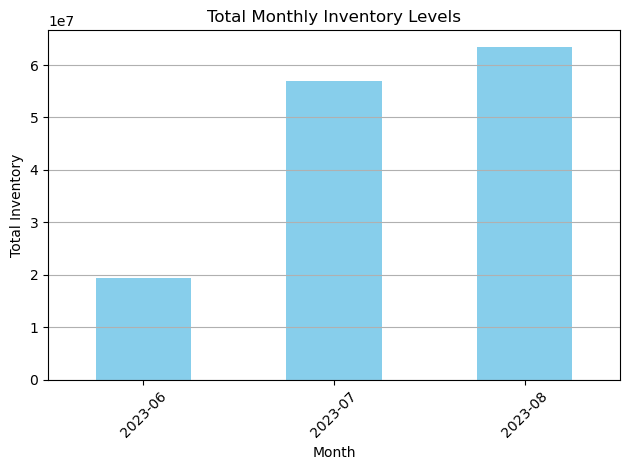

In [25]:
# Plotting the bar chart
plt.figure(figsize=(12, 6))
monthly_totals.plot(kind='bar', color='skyblue', legend=False)
plt.title('Total Monthly Inventory Levels')
plt.xlabel('Month')
plt.ylabel('Total Inventory')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()